In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# CÓDIGOS

In [3]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

In [4]:
dados = pd.read_csv(url_dados, compression = 'zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

In [5]:
pd.crosstab(dados['dose'], dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [14]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [15]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize = True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [20]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize = 'index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [11]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc = 'mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [26]:
dados[['g-0', 'g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


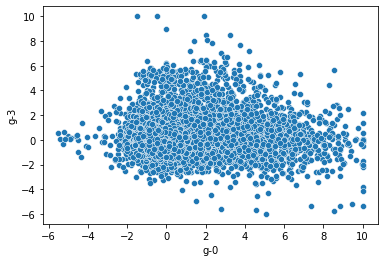

In [25]:
sns.scatterplot(x = 'g-0', y = 'g-3', data=dados)

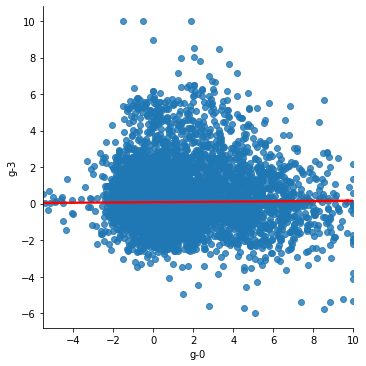

In [32]:
sns.lmplot(data = dados, x='g-0', y='g-3', line_kws={'color':'r'})

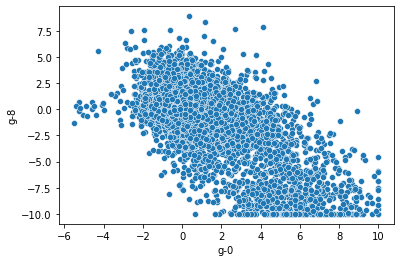

In [29]:
sns.scatterplot(x = 'g-0', y = 'g-8', data=dados)

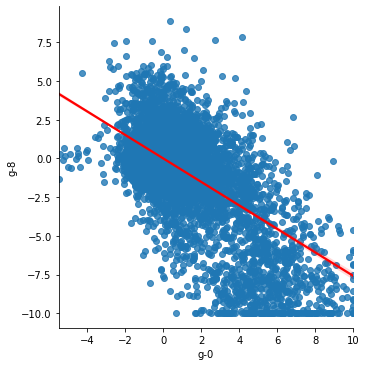

In [31]:
sns.lmplot(data = dados, x='g-0', y='g-8', line_kws={'color':'r'})

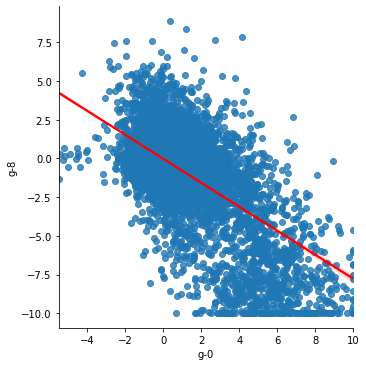

In [35]:
sns.lmplot(data = dados[dados['tratamento'] == 'com_droga'], x='g-0', y='g-8', line_kws={'color':'r'})

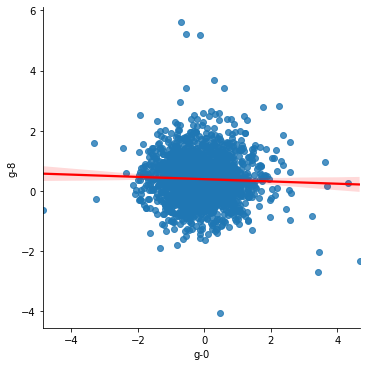

In [34]:
sns.lmplot(data = dados[dados['tratamento'] == 'com_controle'], x='g-0', y='g-8', line_kws={'color':'r'})

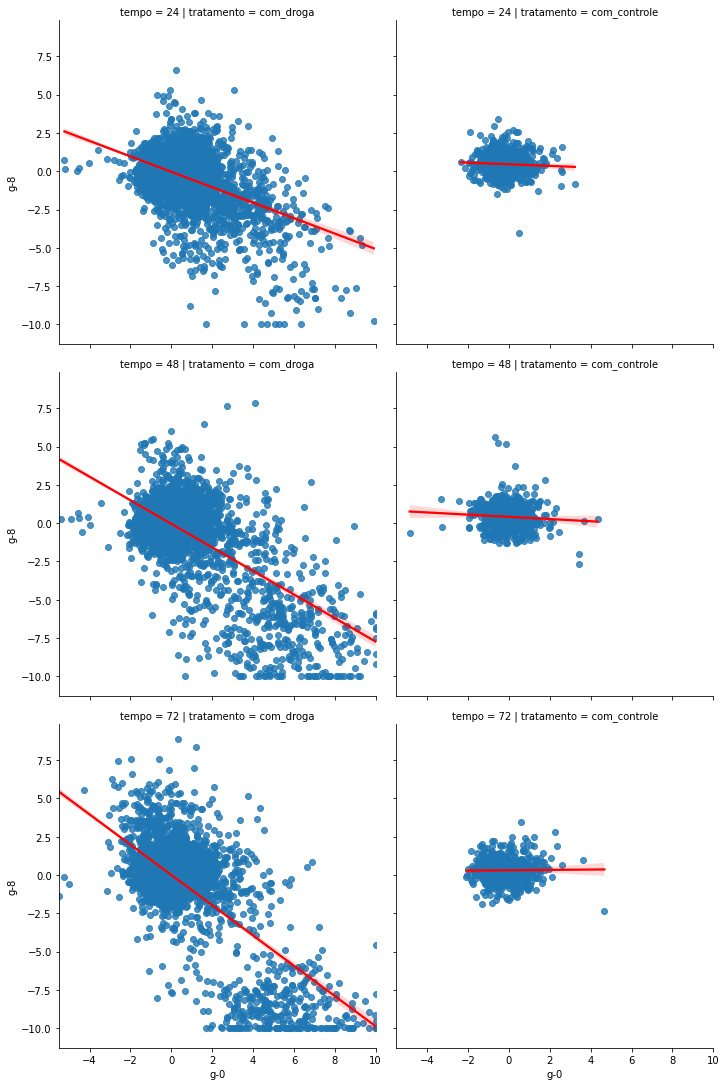

In [39]:
sns.lmplot(data = dados, x='g-0', y='g-8', line_kws = {'color':'red'}, col = 'tratamento', row = 'tempo')

In [41]:
dados.loc[:,'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

In [60]:
corr_genes = dados.loc[:,'g-0':'g-50'].corr()

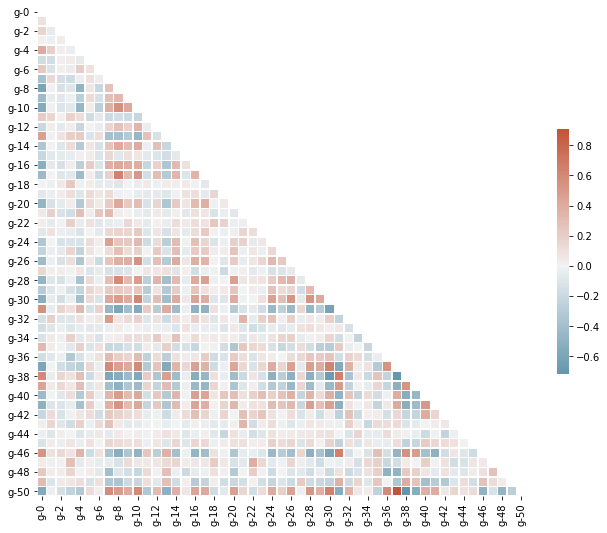

In [61]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_genes, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [64]:
corr_celular = dados.loc[:,'c-0':'c-50'].corr()

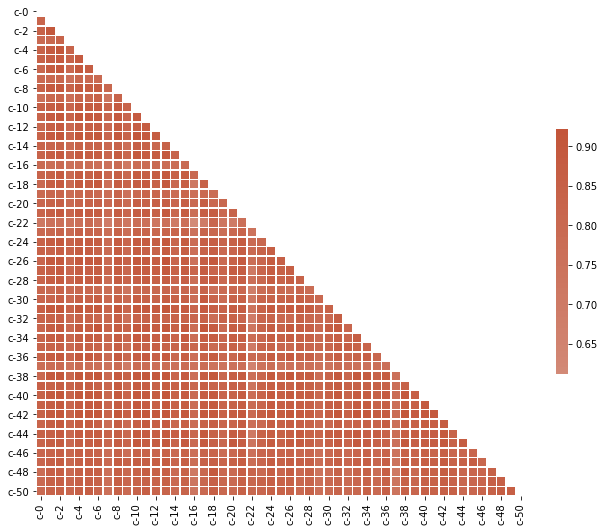

In [65]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##Aula 03

###Desafio 01: Criar tabelas de frequência com pandas.groupby()

###Desafio 02: Normalizar o crosstab pela coluna.

###Desafio 03: Explorar outros agregadores.

###Desafio 04: Explorar o melt.

###Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos. 

###Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

###Desafio 07: Resumo do que você aprendeu com os dados

# Desafio 01

A função groupby precisa vir acompanhada do objeto unstack para organizar as colunas "com_controle" e "com_droga",como exibido anteriormente com a crosstab. Contudo, é possível obter os mesmos resultados sem o uso do unstack - ainda que visualmente fique bem melhor para analisarmos.

In [12]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc = 'mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [81]:
dados.groupby(['dose', 'tempo', 'tratamento'])[['g-0']].mean().unstack()


g-0          
tratamento com_controle com_droga
dose tempo                       
D1   24       -0.251760  0.367996
     48       -0.122773  0.412469
     72       -0.295271  0.286250
D2   24        0.010754  0.115253
     48        0.013174  0.214480
     72        0.070250  0.253439

# Desafio 02

Simplesmente mudamos o filtro normalize = 'index' para normalize = 'columns'

In [63]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize = 'columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

In [64]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize = 'columns').sum()

tratamento
com_controle    1.0
com_droga       1.0
dtype: float64

# Desafio 03

Abaixo utilizei 3 outros tipos de aggfunc: desvio-padrão, máximos e mínimos

In [66]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc = 'std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

In [67]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc = 'max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [162]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc = 'min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

# Desafio 04

A função melt() pode funcionar como uma espécie de filtro de colunas da tabela original dados, como demonstrado abaixo.

In [85]:
pd.melt(dados, id_vars = ['tratamento', 'tempo', 'dose'], value_vars = ['g-0'])

,tratamento,tempo,dose,variable,value
0,com_droga,24,D1,g-0,1.0620
1,com_droga,72,D1,g-0,0.0743
2,com_droga,48,D1,g-0,0.6280
3,com_droga,48,D1,g-0,-0.5138
4,com_droga,72,D2,g-0,-0.3254
...,...,...,...,...,...
23809,com_droga,24,D2,g-0,0.1394
23810,com_droga,24,D2,g-0,-1.3260
23811,com_controle,48,D2,g-0,0.3942
23812,com_droga,24,D1,g-0,0.6660


# Desafio 05

Para o desafio 5, utilizei dois dataframes diferentes de mesmo tamanho para concatená-los na sequência e fazer o heatmap dos tipos de genes vs. tipos celulares

In [164]:
df1 = pd.DataFrame(dados[dados['tratamento']=='com_droga'].loc[:,'g-0':'g-50'])
df1

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,-0.0347,-0.2566,-1.1980,0.3116,-1.0330,0.2208,-0.1143,-0.0251,0.0350,0.4233,-0.1221
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,0.1194,-0.3958,-1.1730,0.4509,1.9250,1.1010,0.2648,-0.3615,0.1710,-0.8900,1.2730
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,0.3477,-0.5561,0.0357,-0.3636,-0.4653,-0.8346,0.1113,-0.7615,-0.4983,0.4552,-0.0978
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,-0.7229,-0.0010,0.1353,-1.6400,-0.7483,-1.0820,-0.1521,0.0747,-0.4851,0.6636,-2.8230
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,0.1302,0.1224,0.9584,0.2126,0.6162,1.1570,1.1140,-0.9416,-0.3780,-0.8147,-0.0803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,-0.5037,-0.5939,0.4825,-0.5187,0.1618,-0.2253,0.3153,0.4839,0.0520,1.3850,0.6502,-0.4198,0.2723,-0.3629,1.0820,-0.0352,0.1911,1.0900,0.0008,0.5474,0.0674,0.3191,-0.1001,-0.5890,-1.0420,0.0163,-0.1602,0.4818,0.6107,0.8200,0.4903
23809,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,-0.1736,0.3686,-0.1565,-0.7362,0.1318,0.1119,1.3410,0.0813,-0.2178,-1.1840,0.5063,-0.8763,-0.3036,-0.2647,-0.3275,-0.2505
23810,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,0.4626,0.0819,0.1586,1.2050,0.0384,-0.0843,-0.8834,-0.6190,0.2070,-0.0265,-3.2790,-0.0587,0.8523,-0.1349,0.4453,-0.4211
23812,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,1.8480,-2.7180,-5.3160,-1.0750,-0.1437,-0.1714,0.0329,0.8309,-0.3018,0.1599,1.5520,-0.0280,2.7900,2.8060,0.8933,-4.3160


In [165]:
df2 = pd.DataFrame(dados[dados['tratamento']=='com_droga'].loc[:,'c-0':'c-50'])
df2

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49,c-50
0,-0.0600,0.1083,0.6864,0.4043,0.4213,-0.6797,0.2888,0.4323,-0.3381,0.3407,0.9084,0.6857,1.0620,0.7602,-0.1048,0.3594,0.6376,-0.2798,-0.4010,0.6842,1.1560,0.3522,-0.3971,-0.2115,-0.2687,0.5196,0.1594,0.8920,0.6485,0.6078,0.3799,-0.1727,0.3817,0.3600,0.5124,-0.1414,0.6159,0.4689,-0.0773,0.4728,-0.0143,-0.5344,0.3578,0.3248,0.8903,0.3431,1.0340,1.3070,-1.0230,0.7709,0.7180
1,0.0927,0.2723,0.2772,0.7776,0.3679,0.5696,0.2835,1.4080,0.3745,0.6775,0.7787,0.2074,1.1110,0.2433,0.2010,0.7094,-0.4210,-0.2274,0.4045,0.1138,0.9950,0.0087,0.4864,-0.0140,0.0164,0.1759,0.6654,0.3556,0.8175,0.0474,0.5589,0.4481,0.1888,0.3712,0.7837,0.6860,0.4123,0.1560,-0.1203,-1.2780,0.6743,0.7358,0.1334,-0.5193,0.2281,0.0158,-0.5658,0.6065,0.6259,0.4716,0.0453
2,-0.1312,-1.4640,0.3394,-1.7790,0.2188,0.5826,-0.7513,0.0543,0.7182,-0.4159,0.3084,-0.0899,-0.0397,-0.5077,-0.5072,0.0100,-0.6915,0.0643,-0.8927,-0.2048,0.0773,0.5971,-0.1602,-0.2028,-0.2216,-1.1380,0.3668,-1.0620,-0.7736,0.6225,0.6274,-0.3038,0.1171,-0.0550,-0.0289,1.1740,-0.7937,-1.0610,-0.6409,0.3884,-1.0330,-0.0055,0.1212,-0.7020,-0.7065,-0.5192,-0.3181,0.1787,0.3354,0.1349,-0.3569
3,-0.3998,-4.5520,-2.7350,-1.9630,-2.8610,-1.2670,-2.5830,-0.5036,-3.1590,-1.8510,-2.2730,-4.6920,-1.2750,-1.4970,-0.0156,-1.9350,-1.3430,-0.5252,-2.7210,-0.2524,0.9197,-3.1220,-1.9180,-0.6761,-2.8360,-1.6890,-4.4990,-1.5190,-2.2730,-0.3250,0.1895,-2.4220,0.0670,-1.9870,-0.6482,-0.0023,-1.9930,-0.8042,-3.6160,-0.3487,-1.2560,-2.7220,-2.1970,-2.9030,-1.1030,-2.3020,-2.0030,-1.3390,-3.0160,-3.0040,-2.8880
4,-0.3774,0.7364,-0.1659,0.2341,1.0060,0.3204,-0.0852,-0.2284,-0.2533,-0.3174,0.9642,-0.0853,0.1559,0.1419,0.1197,0.6774,0.1332,-0.5176,0.1232,0.0827,0.6995,0.5953,1.0600,-0.4255,0.8624,1.0010,0.0840,-0.6553,-0.1093,0.0587,0.5490,0.6331,0.5227,0.2186,0.2781,0.8947,-0.0202,0.5966,0.2249,0.5671,0.6382,-0.3909,0.7040,0.1462,0.0655,-0.5605,0.5903,-0.2353,-0.1285,-0.1740,0.3559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,0.9538,-0.8733,-0.2969,-0.7964,0.2447,-0.1552,-0.2402,-0.3265,-0.1232,0.6442,0.0523,0.1678,-0.5853,0.3106,0.6050,0.3089,0.5085,0.7467,0.0320,-0.7075,-0.5713,0.1213,0.1063,0.7528,0.2746,-0.1976,0.2656,0.4237,0.4498,-0.1849,-0.5164,-0.4928,0.3341,-0.1388,0.3086,-0.4474,1.3780,-0.5364,-0.0218,0.0419,-0.0433,0.0054,0.0597,0.0708,0.8532,0.2379,0.2558,0.3631,-0.0474,-0.6761,0.6650
23809,0.4224,0.1871,-0.4822,0.3713,0.4754,0.9512,0.4650,0.3005,0.0338,-0.7734,0.3922,-0.0028,1.3250,0.3832,1.4350,-0.3465,-0.6813,-0.0440,0.0016,-0.7588,0.5373,-0.3728,0.1439,0.3021,-0.0546,0.7490,-0.1772,1.0870,0.9235,0.7491,1.0560,-0.3548,0.4730,0.3669,0.3175,0.0836,-0.0980,-0.2717,-0.2635,-0.0231,0.1908,0.7024,0.6459,-0.8431,-0.1879,0.8394,0.5270,-0.6097,0.7577,0.0365,0.1181
23810,0.2144,0.4350,0.1174,1.3960,-0.6772,0.2316,-0.5396,0.0581,0.6067,-0.4622,0.1112,1.4440,-0.8000,0.3615,-0.4301,-0.0562,-0.2590,-1.3780,-0.3346,0.0869,-0.1766,-0.1957,0.8420,-0.9363,-0.6085,0.9446,-0.8192,0.7525,-0.3499,0.2467,-0.2245,0.2532,-1.8510,0.0680,0.8498,-0.5285,0.3788,0.2031,0.9963,0.0844,0.5501,0.7954,-0.7949,0.5596,-0.4925,0.4604,-0.5548,-0.7309,0.2137,-0.1295,-0.1987
23812,0.5377,1.3240,0.9679,0.1419,1.2230,0.3404,-0.1589,0.8667,0.7749,-0.1458,0.4287,0.6342,-0.3830,-0.0918,-0.1479,1.4290,0.2736,0.9842,0.3394,-0.1685,0.3873,-0.1351,-1.0770,0.7400,0.7976,0.2998,0.2517,0.4569,-0.6226,0.2499,1.7530,0.2476,0.1594,-0.4389,0.9799,-0.5447,0.1770,1.2550,0.4623,-0.8128,0.9177,0.7495,-0.4439,0.7247,0.7867,0.7962,0.3351,0.5460,-0.7703,-0.1128,0.9409


In [166]:
df = pd.concat([df1, df2], axis =1, join = 'inner')
df

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49,c-50
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,...,0.6857,1.0620,0.7602,-0.1048,0.3594,0.6376,-0.2798,-0.4010,0.6842,1.1560,0.3522,-0.3971,-0.2115,-0.2687,0.5196,0.1594,0.8920,0.6485,0.6078,0.3799,-0.1727,0.3817,0.3600,0.5124,-0.1414,0.6159,0.4689,-0.0773,0.4728,-0.0143,-0.5344,0.3578,0.3248,0.8903,0.3431,1.0340,1.3070,-1.0230,0.7709,0.7180
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,...,0.2074,1.1110,0.2433,0.2010,0.7094,-0.4210,-0.2274,0.4045,0.1138,0.9950,0.0087,0.4864,-0.0140,0.0164,0.1759,0.6654,0.3556,0.8175,0.0474,0.5589,0.4481,0.1888,0.3712,0.7837,0.6860,0.4123,0.1560,-0.1203,-1.2780,0.6743,0.7358,0.1334,-0.5193,0.2281,0.0158,-0.5658,0.6065,0.6259,0.4716,0.0453
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,...,-0.0899,-0.0397,-0.5077,-0.5072,0.0100,-0.6915,0.0643,-0.8927,-0.2048,0.0773,0.5971,-0.1602,-0.2028,-0.2216,-1.1380,0.3668,-1.0620,-0.7736,0.6225,0.6274,-0.3038,0.1171,-0.0550,-0.0289,1.1740,-0.7937,-1.0610,-0.6409,0.3884,-1.0330,-0.0055,0.1212,-0.7020,-0.7065,-0.5192,-0.3181,0.1787,0.3354,0.1349,-0.3569
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,...,-4.6920,-1.2750,-1.4970,-0.0156,-1.9350,-1.3430,-0.5252,-2.7210,-0.2524,0.9197,-3.1220,-1.9180,-0.6761,-2.8360,-1.6890,-4.4990,-1.5190,-2.2730,-0.3250,0.1895,-2.4220,0.0670,-1.9870,-0.6482,-0.0023,-1.9930,-0.8042,-3.6160,-0.3487,-1.2560,-2.7220,-2.1970,-2.9030,-1.1030,-2.3020,-2.0030,-1.3390,-3.0160,-3.0040,-2.8880
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,...,-0.0853,0.1559,0.1419,0.1197,0.6774,0.1332,-0.5176,0.1232,0.0827,0.6995,0.5953,1.0600,-0.4255,0.8624,1.0010,0.0840,-0.6553,-0.1093,0.0587,0.5490,0.6331,0.5227,0.2186,0.2781,0.8947,-0.0202,0.5966,0.2249,0.5671,0.6382,-0.3909,0.7040,0.1462,0.0655,-0.5605,0.5903,-0.2353,-0.1285,-0.1740,0.3559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,-0.5037,-0.5939,0.4825,-0.5187,0.1618,-0.2253,0.3153,0.4839,0.0520,1.3850,0.6502,-0.4198,0.27

Apliquei abaixo um filtro de linhas e colunas, pois não é interessante visualmente termos as mesmas informações repetidas em ambos (além de "poluir" a informação visual)

In [167]:
corr_gc = df.corr()
corr_gc = corr_gc.loc['c-0':'c-50','g-0':'g-50']
corr_gc

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50
c-0,-0.631908,-0.031841,-0.171517,-0.040447,-0.418163,0.215371,-0.118444,0.506307,0.626995,0.446771,0.601936,-0.232648,0.355190,-0.466533,0.478462,0.045237,0.579815,0.522815,-0.030417,0.085308,0.449958,0.119866,0.096883,0.160226,0.469238,0.336543,0.507531,-0.179987,0.567359,0.376573,0.666818,-0.706239,0.220673,-0.095103,0.270164,-0.281262,0.147235,0.628926,-0.762883,-0.541089,0.594457,0.665422,0.244615,0.009135,-0.015408,0.219089,-0.642335,0.052363,-0.108113,-0.417391,0.612990
c-1,-0.633972,-0.023024,-0.184193,-0.098196,-0.390767,0.205295,-0.095505,0.576042,0.607203,0.487008,0.660332,-0.270412,0.370312,-0.496344,0.487861,0.064477,0.577033,0.519288,-0.069694,0.036996,0.375287,0.160524,0.090411,0.174672,0.492006,0.295822,0.519855,-0.157073,0.588804,0.393881,0.712444,-0.708761,0.289522,-0.046722,0.221826,-0.210264,0.285071,0.710012,-0.799770,-0.549335,0.552035,0.600730,0.199898,0.048579,-0.008973,0.197796,-0.620548,0.036769,-0.191877,-0.350077,0.705780
c-2,-0.647684,-0.031111,-0.181112,-0.091010,-0.404131,0.217897,-0.095426,0.587199,0.602322,0.500464,0.658062,-0.276044,0.367588,-0.504182,0.494613,0.079157,0.599163,0.522216,-0.056341,0.047235,0.413506,0.140381,0.075329,0.168653,0.512810,0.308209,0.560970,-0.168326,0.589458,0.401231,0.731951,-0.722608,0.299120,-0.052279,0.246096,-0.254036,0.267909,0.723729,-0.825206,-0.573669,0.570852,0.624210,0.212051,0.036253,-0.005739,0.212401,-0.641454,0.040492,-0.205239,-0.373018,0.717616
c-3,-0.613628,0.018946,-0.161156,-0.031864,-0.370920,0.200823,-0.104579,0.541146,0.571182,0.465320,0.604643,-0.233663,0.340733,-0.462575,0.486311,0.053650,0.569070,0.499871,-0.019461,0.085322,0.404183,0.136520,0.105413,0.183472,0.466868,0.300430,0.526471,-0.179794,0.517447,0.357577,0.656951,-0.685808,0.301847,-0.133892,0.282379,-0.263640,0.189547,0.661421,-0.773236,-0.541902,0.593931,0.585294,0.251001,0.028306,-0.047368,0.227979,-0.585598,0.092212,-0.157105,-0.408831,0.650319
c-4,-0.612773,-0.018574,-0.183858,-0.071537,-0.374063,0.213457,-0.068764,0.585801,0.548365,0.497349,0.637563,-0.260282,0.385755,-0.466558,0.500850,0.067626,0.585199,0.503244,-0.067668,0.022032,0.414685,0.164657,0.068648,0.177711,0.523539,0.307696,0.566061,-0.143384,0.559958,0.386407,0.716693,-0.707350,0.316942,-0.089019,0.318008,-0.247706,0.254174,0.709870,-0.825221,-0.560406,0.545654,0.596142,0.202727,0.030330,0.006795,0.221387,-0.624910,0.078609,-0.204197,-0.355611,0.709768
c-5,-0.637636,0.003835,-0.173981,-0.058413,-0.397658,0.210168,-0.095677,0.559655,0.596905,0.471902,0.630767,-0.245066,0.378851,-0.473475,0.501750,0.036474,0.586850,0.518833,-0.074163,0.043881,0.426674,0.148191,0.048210,0.161902,0.509624,0.325988,0.546435,-0.178893,0.555248,0.405654,0.719474,-0.724830,0.303010,-0.095010,0.294411,-0.286470,0.222999,0.694799,-0.818028,-0.573608,0.582193,0.592693,0.217911,0.033965,-0.002721,0.234215,-0.639266,0.046118,-0.144880,-0.406434,0.695564
c-6,-0.677327,-0.019734,-0.183792,-0.126018,-0.375925,0.198405,-0.091937,0.611473,0.611426,0.501137,0.667521,-0.283016,0.362773,-0.510790,0.465095,0.098411,0.581125,0.506752,-0.092012,0.025223,0.421469,0.157945,0.012517,0.172311,0.511812,0.280442,0.557363,-0.138544,0.584689,0.389073,0.728136,-0.711189,0.317265,-0.009377,0.238396,-0.262553,0.318150,0.755392,-0.832295,-0.567094,0.524440,0.603208,0.212761,0.058319,0.015281,0.195673,-0.628818,-0.006423,-0.275293,-0.380076,0.749106
c-7,-0.616219,0.008728,-0.180489,-0.033997,-0.390228,0.179293,-0.113589,0.510641,0.585768,0.446600,0.593531,-0.182898,0.349647,-0.438968,0.471283,0.057013,0.554263,0.501205,-0.037230,0.057889,0.448805,0.106743,0.056193,0.154720,0.448388,0.340823,0.504860,-0.167056,0.538726,0.333831,0.654508,-0.661761,0.220681,-0.096263,0.259570,-0.290106,0.166534,0.630281,-0.747516,-0.522915,0.563

Abaixo utilizei a função .min() para avaliar mais de perto um par gene/célula que esteja fortemente cor

In [170]:
corr_gc.min()

g-0    -0.692599
g-1    -0.031841
g-2    -0.197008
g-3    -0.126018
g-4    -0.429168
g-5     0.167370
g-6    -0.139300
g-7     0.474978
g-8     0.489339
g-9     0.405627
g-10    0.517849
g-11   -0.283016
g-12    0.325797
g-13   -0.538238
g-14    0.450486
g-15    0.002536
g-16    0.502992
g-17    0.413205
g-18   -0.115228
g-19   -0.014824
g-20    0.312592
g-21    0.099390
g-22   -0.016290
g-23    0.151738
g-24    0.407425
g-25    0.265037
g-26    0.475079
g-27   -0.219834
g-28    0.412968
g-29    0.288749
g-30    0.585775
g-31   -0.725747
g-32    0.212390
g-33   -0.154020
g-34    0.178023
g-35   -0.327287
g-36    0.131697
g-37    0.578454
g-38   -0.841954
g-39   -0.595013
g-40    0.493993
g-41    0.428883
g-42    0.161480
g-43    0.006317
g-44   -0.051067
g-45    0.191377
g-46   -0.645589
g-47   -0.006423
g-48   -0.309324
g-49   -0.417391
g-50    0.564204
dtype: float64

Plotei o heatmap abaixo sem a mask de upper triangle, já que visualmente isto acaba por filtrar informação na minha análise - assim não perco metade da informação quando for comparar e visualizar quais pares tem mais ou menos correlação

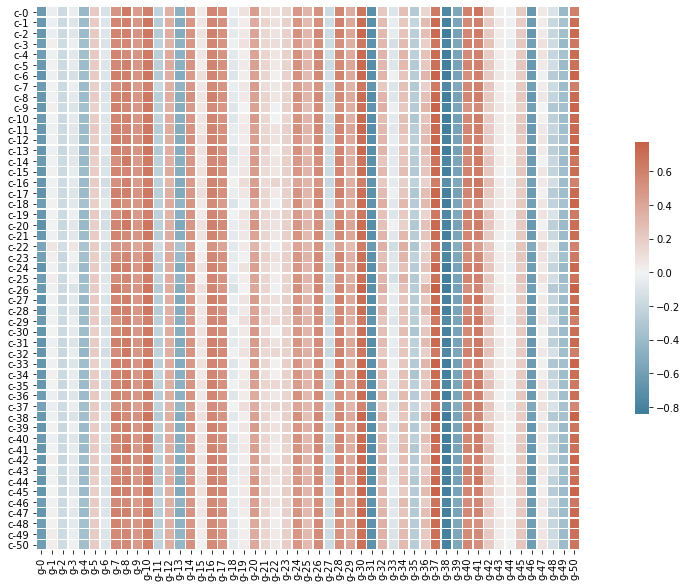

In [157]:
# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr_gc, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_gc, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Com a função .max() e o heatmap acima, pude perceber que o g-38 e o c-13 estão fortemente descorrelacionados (c = -0.841954). Com isso, esperamos numa análise mais próxima, que as variáveis sejam inversamente proporcionais, como os gráficos sugerem abaixo. Importante notar que não só no tratamento com droga, mas também no com controle, o aumento na variável g-38 tende a diminuir a variável c-13. Ou seja, até mesmo no esperado controle desta última, o aumento do número de horas pode influenciar num pequeno descontrole deste tipo de tratamento quando analisamos a relação g-38 vs. c-13.

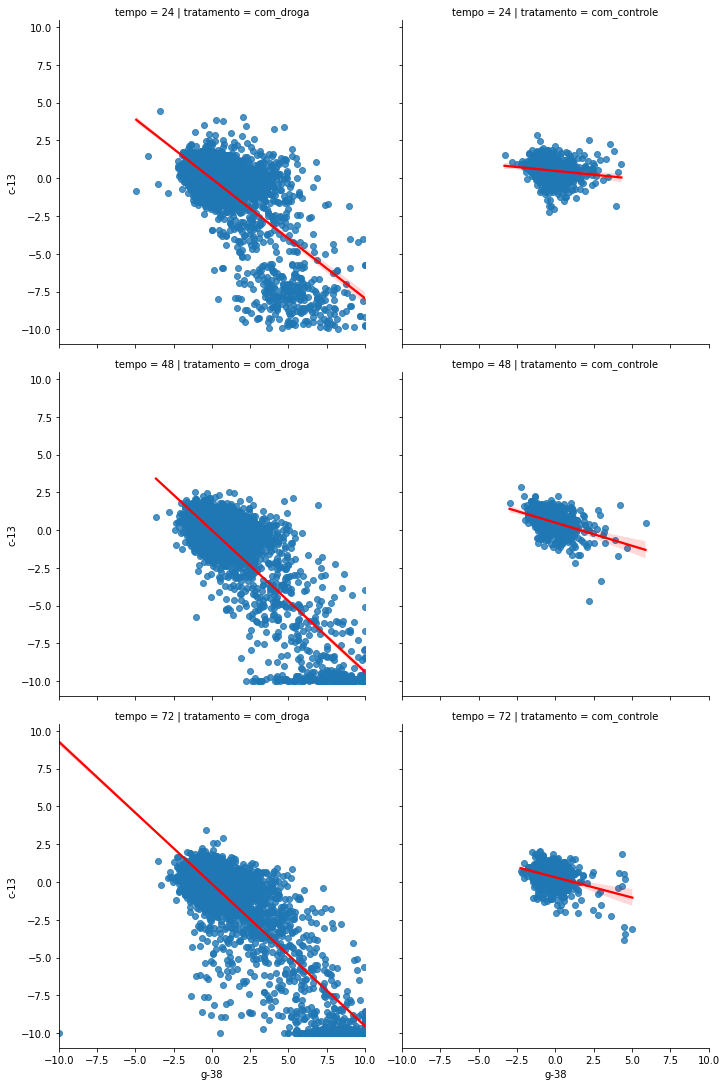

In [171]:
sns.lmplot(data = dados, x='g-38', y='c-13', line_kws = {'color':'red'}, col = 'tratamento', row = 'tempo')

# Desafio 06

In [172]:
np.ones_like(corr_gc, dtype=bool)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

A função triu retorna o upper triangle de uma matriz (ao contrário da tril, que retorna o lower triangle - como denotado pela última letra). Depois, o comando np.ones_like() retorna uma matriz de 0 e 1 (True or False, porque o tipo booleano é chamado) para ser utilizado como mask do nosso plot heatmap. Os demais comandos tem a ver com a formatação, cores de barras, tamanhos e centralização de figura, limites máximos, etc.

# Desafio 07

Pelo menos para os 50 primeiros tipo de gene, pude visualmente perceber que temos mais correlações positivas do que negativas (mais vermelhos do que azuis no heatmap). Alguns tipos chamam a atenção pela forte descorrelação e talvez seja interessantes os analisar mais de perto (g-0, g-31, g-38, por exemplo) para entender melhor o efeito das drogas testadas.